<hr>
<div><h1 align=center><font style="font-style:italic;">基于患者数据的子宫癌病理类型的统计分析与分类</font></h1></div>
<div><h3 align=center>作者：<font style="font-style:italic;">刘星雨</font></h3></div>

# 目录
## 一、 世界癌症背景分析
### 1.综述
### 2.实现
#### 2.1 数据收集：世界癌症发生率的排名与世界女性癌症发生率的排名
#### 2.2 数据分析：世界癌症发生率
#### 2.3 数据分析： 宫颈癌世界分布
## 二、 基于病例的分类与统计分析
### 1. SVC分类器
### 2. PCA
### 3. T Test与Rank-sum Test分析统计学差异 

注：三个爬虫不能依次运行，运行后两个时需要restart

# 一、 世界癌症背景分析
## 1. 综述
我首先爬取了世界癌症发生率的排名与世界女性癌症发生率的排名的数据，并将其存入了文件中。通过做饼图可视化分析得到，在世界所有人口中，肺癌和乳腺癌最为普遍，宫颈癌位列第八；在女性中，宫颈癌位列第四，因此，研究宫颈癌具有重要意义。此外，我还爬取了宫颈癌发生率高的地区信息，并将其可视化在地图上。
## 2. 实现
### 2.1 数据收集：世界癌症发生率的排名与世界女性癌症发生率的排名
爬取了 https://www.wcrf.org/dietandcancer/cancer-trends/worldwide-cancer-data

In [1]:
import scrapy
import time
import csv
import os

class MySpider1(scrapy.Spider):
    
    name = "spider"
      
    def __init__(self):
        
        self.file = open('GlobalCancerIncidence.csv', 'w+',encoding='GBK', newline='')
        print('ok?')
        self.csvWrite = csv.DictWriter(self.file, fieldnames=['Rank','Cancer','New cases diagnosed in 2018','% of all cancers (excl. non-melanoma skin cancer)'])
        print('ok?')
        item = {"Rank":"Rank","Cancer": "Cancer","New cases diagnosed in 2018":"New cases diagnosed in 2018","% of all cancers (excl. non-melanoma skin cancer)":"% of all cancers (excl. non-melanoma skin cancer)"}
        print('ok?')
        self.csvWrite.writerow(item)
        print('ok?')
        #设置待爬取网站列表
        self.urls=['https://www.wcrf.org/dietandcancer/cancer-trends/worldwide-cancer-data']
        
                    
    def start_requests(self):
        #self.init_urls()
        for url in self.urls:
            yield scrapy.Request(url=url, callback=self.parse)    
    
    #parse方法会在每个request收到response之后调用
    def parse(self, response):        
        #table=response.xpath('//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody')
       # //*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody/tr[3]/td[1]
    #//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[2]/tbody
        print('ok?')
        rows = response.xpath('//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody/tr')
        for row in rows:
            print(row)
            print('---')
            first=row.xpath('td[1]//text()').extract_first()
            first=first.replace('\xa0','').replace('\n','')
            print('ok?')
            second =row.xpath('td[2]//text()').extract_first()
            third =row.xpath('td[3]//text()').extract_first()
            fourth =row.xpath('td[4]//text()').extract_first()
            fourth=fourth.replace('\xa0','').replace('\n','')
            print(third)
            #构建字典对象
            item = {"Rank":first,"Cancer": second,"New cases diagnosed in 2018":third,"% of all cancers (excl. non-melanoma skin cancer)":fourth}
            print('ok?')
            print(item)
            self.csvWrite.writerow(item)
            print('ok?')

        #将内容写入文件
        self.file.flush()
        os.fsync(self.file)
        
        print("over: " + response.url)


In [2]:
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider1)
process.start() 

2018-12-08 14:30:36 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-12-08 14:30:36 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 18.9.0, Python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.2.2, Platform Windows-10-10.0.17134-SP0
2018-12-08 14:30:36 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-12-08 14:30:36 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']


ok?
ok?
ok?
ok?


2018-12-08 14:30:37 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddleware',
 'scrapy.downloadermiddlewares.httpproxy.HttpProxyMiddleware',
 'scrapy.downloadermiddlewares.stats.DownloaderStats']
2018-12-08 14:30:37 [scrapy.middleware] INFO: Enabled spider middlewares:
['scrapy.spidermiddlewares.httperror.HttpErrorMiddleware',
 'scrapy.spidermiddlewares.offsite.OffsiteMiddleware',
 'scrapy.spidermiddlewares.ref

ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody/tr' data='<tr>\r\n\t\t\t<td>\xa0</td>\r\n\t\t\t<td>All cancers*'>
---
ok?
17,036,901
ok?
{'Rank': '', 'Cancer': 'All cancers*', 'New cases diagnosed in 2018': '17,036,901', '% of all cancers (excl. non-melanoma skin cancer)': ''}
ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody/tr' data='<tr>\r\n\t\t\t<td>1</td>\r\n\t\t\t<td>Lung</td>\r\n\t'>
---
ok?
2,093,876
ok?
{'Rank': '1', 'Cancer': 'Lung', 'New cases diagnosed in 2018': '2,093,876', '% of all cancers (excl. non-melanoma skin cancer)': '12.3'}
ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[1]/tbody/tr' data='<tr>\r\n\t\t\t<td>2</td>\r\n\t\t\t<td>Breast</td>\r'>
---
ok?
2,088,849
ok?
{'Rank': '2', 'Cancer': 'Breast', 'New cases diagnosed in 2018': '2,088,849', '% of all cancers (excl. non-melanoma skin cancer)': '12.3'}
ok?
<Selector xpath='//*[@id="block-sy

In [1]:
import scrapy
import time
import csv
import os

class MySpider2(scrapy.Spider):
    
    name = "spider"
      
    def __init__(self):
        
        self.file = open('GlobalCancerIncidenceInWomen.csv', 'w+',encoding='GBK', newline='')
        print('ok?')
        self.csvWrite = csv.DictWriter(self.file, fieldnames=['Rank','Cancer','New cases diagnosed in 2018','% of all cancers (excl. non-melanoma skin cancer)'])
        print('ok?')
        item = {"Rank":"Rank","Cancer": "Cancer","New cases diagnosed in 2018":"New cases diagnosed in 2018","% of all cancers (excl. non-melanoma skin cancer)":"% of all cancers (excl. non-melanoma skin cancer)"}
        print('ok?')
        self.csvWrite.writerow(item)
        print('ok?')
        #设置待爬取网站列表
        self.urls=['https://www.wcrf.org/dietandcancer/cancer-trends/worldwide-cancer-data']
        
                    
    def start_requests(self):
        #self.init_urls()
        for url in self.urls:
            yield scrapy.Request(url=url, callback=self.parse)    
    
    #parse方法会在每个request收到response之后调用
    def parse(self, response):        
        print('ok?')
        rows = response.xpath('//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[3]/tbody/tr')
        for row in rows:
            print(row)
            print('---')
            
            first=row.xpath('td[1]//text()').extract_first()
            first=first.replace('\xa0','')
            print('ok?')
            second =row.xpath('td[2]//text()').extract_first()
            third =row.xpath('td[3]//text()').extract_first()
            fourth =row.xpath('td[4]//text()').extract_first()
            fourth=fourth.replace('\xa0','')
            print(third)
            #构建字典对象
            item = {"Rank":first,"Cancer": second,"New cases diagnosed in 2018":third,"% of all cancers (excl. non-melanoma skin cancer)":fourth}
            print('ok?')
            print(item)
            self.csvWrite.writerow(item)
            print('ok?')

        #将内容写入文件
        self.file.flush()
        os.fsync(self.file)
        
        print("over: " + response.url)


In [2]:
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider2)
process.start() 

2018-12-08 14:30:48 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-12-08 14:30:48 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 18.9.0, Python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.2.2, Platform Windows-10-10.0.17134-SP0
2018-12-08 14:30:48 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-12-08 14:30:48 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']


ok?
ok?
ok?
ok?


2018-12-08 14:30:48 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddleware',
 'scrapy.downloadermiddlewares.httpproxy.HttpProxyMiddleware',
 'scrapy.downloadermiddlewares.stats.DownloaderStats']
2018-12-08 14:30:48 [scrapy.middleware] INFO: Enabled spider middlewares:
['scrapy.spidermiddlewares.httperror.HttpErrorMiddleware',
 'scrapy.spidermiddlewares.offsite.OffsiteMiddleware',
 'scrapy.spidermiddlewares.ref

ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[3]/tbody/tr' data='<tr>\r\n\t\t\t<td>\xa0</td>\r\n\t\t\t<td>All cancers*'>
---
ok?
8,218,216
ok?
{'Rank': '', 'Cancer': 'All cancers*', 'New cases diagnosed in 2018': '8,218,216', '% of all cancers (excl. non-melanoma skin cancer)': ''}
ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[3]/tbody/tr' data='<tr>\r\n\t\t\t<td>1</td>\r\n\t\t\t<td>Breast</td>\r'>
---
ok?
2,088,849
ok?
{'Rank': '1', 'Cancer': 'Breast', 'New cases diagnosed in 2018': '2,088,849', '% of all cancers (excl. non-melanoma skin cancer)': '25.4'}
ok?
<Selector xpath='//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table[3]/tbody/tr' data='<tr>\r\n\t\t\t<td>2</td>\r\n\t\t\t<td>Colorectal**'>
---
ok?
794,958
ok?
{'Rank': '2', 'Cancer': 'Colorectal**', 'New cases diagnosed in 2018': '794,958', '% of all cancers (excl. non-melanoma skin cancer)': '9.7'}
ok?
<Selector xpath='//*[@id="block-syst

### 2.2 数据分析：世界癌症发生率的排名与世界女性癌症发生率的排名

In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline  

### 2.2.1 读取世界癌症发生率文件并做饼图

In [2]:
df=pd.read_csv("GlobalCancerIncidence.csv")
df.head(5)

,Rank,Cancer,New cases diagnosed in 2018,% of all cancers (excl. non-melanoma skin cancer)
0,NaN,All cancers*,"17,036,901",NaN
1,1.0,Lung,"2,093,876",12.3
2,2.0,Breast,"2,088,849",12.3
3,3.0,Colorectal**,"1,800,977",10.6
4,4.0,Prostate,"1,276,106",7.5


In [3]:
df.drop(0,axis=0,inplace=True)

In [4]:
y=df["% of all cancers (excl. non-melanoma skin cancer)"]
x=df["Cancer"]

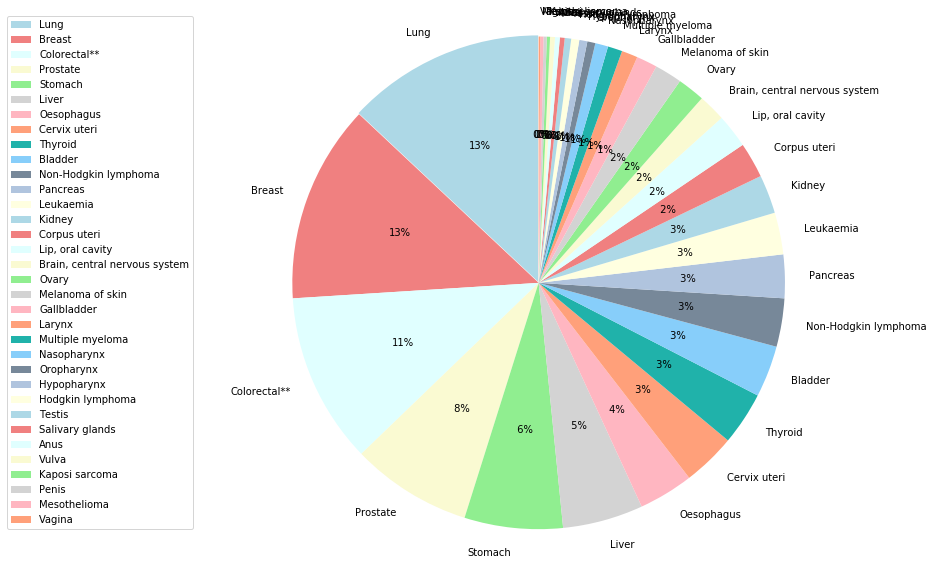

In [5]:
labels = x
sizes = y*2

colors=['lightblue',
'lightcoral',
'lightcyan',
'lightgoldenrodyellow',
'lightgreen',
'lightgray',
'lightpink',
'lightsalmon',
'lightseagreen',
'lightskyblue',
'lightslategray',
'lightsteelblue',
'lightyellow',]

explode = (0.005, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12, 10))
patches, l_text, p_text = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                   startangle=90, pctdistance=0.6)

for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1))

plt.grid()
plt.show()


可以看出，在世界所有人口中，肺癌和乳腺癌最为普遍，宫颈癌排名第八。
### 2.2.2 读取世界女性癌症发生率文件并做饼图

In [6]:
women=pd.read_csv("GlobalCancerIncidenceInWomen.csv")
women.head(5)

,Rank,Cancer,New cases diagnosed in 2018,% of all cancers (excl. non-melanoma skin cancer)
0,NaN,All cancers*,"8,218,216",NaN
1,1.0,Breast,"2,088,849",25.4
2,2.0,Colorectal**,"794,958",9.7
3,3.0,Lung,"725,352",8.8
4,4.0,Cervix uteri,"569,847",6.9


In [7]:
women.drop(0,axis=0,inplace=True)
y=women["% of all cancers (excl. non-melanoma skin cancer)"]
x=women["Cancer"]

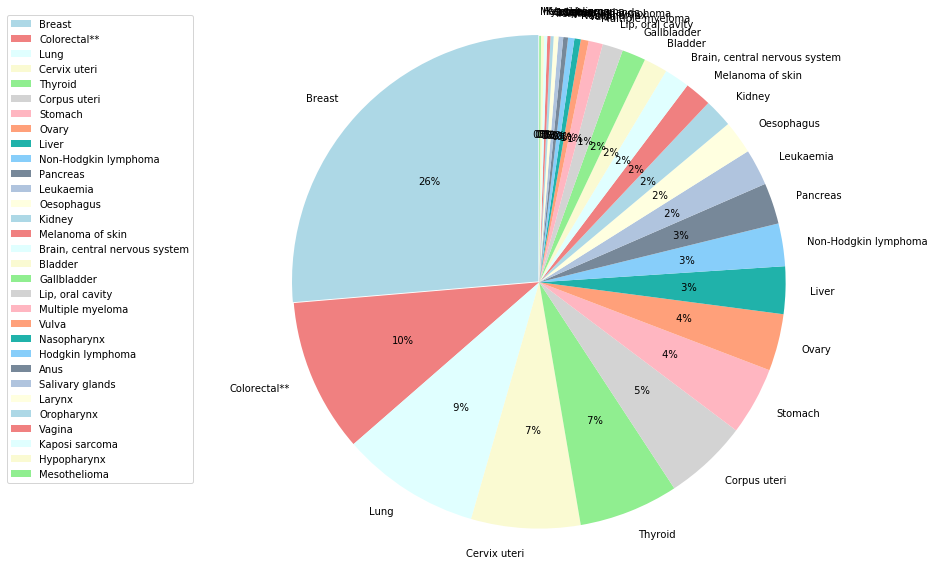

In [8]:
labels = x
sizes = y*2

colors=['lightblue',
'lightcoral',
'lightcyan',
'lightgoldenrodyellow',
'lightgreen',
'lightgray',
'lightpink',
'lightsalmon',
'lightseagreen',
'lightskyblue',
'lightslategray',
'lightsteelblue',
'lightyellow',]

explode = (0.005, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12, 10))
patches, l_text, p_text = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,
                                   startangle=90, pctdistance=0.6)

for t in l_text:
    t.set_size = 30
for t in p_text:
    t.set_size = 20
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1))

plt.grid()
plt.show()

可以得到以下结论：<br>
·乳腺癌是全球女性中最常见的癌症，占2018年诊断出的新病例总数的25.4％。<br>
·前三位 - 乳腺癌，结肠直肠癌和肺癌 - 占所有癌症的43.9％（不包括非黑色素瘤皮肤癌）。 <br>
·宫颈癌是女性中第四大常见癌症，占2018年诊断出的新病例总数的6.9％。<br>

### 2.3 数据收集：宫颈癌的地区分布

本人爬取了宫颈癌发生率最高的前20国家排行榜，网址为：https://www.wcrf.org/dietandcancer/cancer-trends/cervical-cancer-statistics

In [1]:
import scrapy
import time
import csv
import os

class MySpider(scrapy.Spider):
    
    name = "spider"
      
    def __init__(self):
        
        self.file = open('CancerRate.csv', 'w+',encoding='GBK', newline='')
        print('ok?')
        self.csvWrite = csv.DictWriter(self.file, fieldnames=['Rank','Country','Age-standardised rate per 100,000'])
        print('ok?')
        item = {"Rank":"Rank","Country": "Country","Age-standardised rate per 100,000":"Age-standardised rate per 100,000"}
        print('ok?')
        self.csvWrite.writerow(item)
        print('ok?')
        #设置待爬取网站列表
        self.urls=['https://www.wcrf.org/dietandcancer/cancer-trends/cervical-cancer-statistics']
        
                    
    def start_requests(self):
        #self.init_urls()
        for url in self.urls:
            yield scrapy.Request(url=url, callback=self.parse)    
    
    #parse方法会在每个request收到response之后调用
    def parse(self, response):        
        table=response.xpath('//*[@id="block-system-main"]/div[2]/div/div/div[1]/div[2]/table/tbody')
        print('ok?')
        rows = table.xpath('//tr')
        for row in rows[1:]:
            print(row)
            print('---')
            first=row.xpath('td[1]//text()').extract_first()
            second =row.xpath('td[2]//text()').extract_first()
            third =row.xpath('td[3]//text()').extract_first()
    
            
            #构建字典对象
            item = {"Rank":first,"Country": second,"Age-standardised rate per 100,000":third}
            self.csvWrite.writerow(item)

        #将内容写入文件
        self.file.flush()
        os.fsync(self.file)
        
        print("over: " + response.url)


In [2]:
from scrapy.crawler import CrawlerProcess

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider)
process.start() 

2018-12-08 14:31:23 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2018-12-08 14:31:23 [scrapy.utils.log] INFO: Versions: lxml 4.2.5.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 18.9.0, Python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.2.2, Platform Windows-10-10.0.17134-SP0
2018-12-08 14:31:23 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-12-08 14:31:23 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']


ok?
ok?
ok?
ok?


2018-12-08 14:31:23 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddleware',
 'scrapy.downloadermiddlewares.httpproxy.HttpProxyMiddleware',
 'scrapy.downloadermiddlewares.stats.DownloaderStats']
2018-12-08 14:31:23 [scrapy.middleware] INFO: Enabled spider middlewares:
['scrapy.spidermiddlewares.httperror.HttpErrorMiddleware',
 'scrapy.spidermiddlewares.offsite.OffsiteMiddleware',
 'scrapy.spidermiddlewares.ref

ok?
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>1</td>\r\n\t\t\t<td>Swaziland</t'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>2</td>\r\n\t\t\t<td>Malawi</td>\r'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>3</td>\r\n\t\t\t<td>Zambia</td>\r'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>4</td>\r\n\t\t\t<td>Zimbabwe</td'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>5</td>\r\n\t\t\t<td>Tanzania</td'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>6</td>\r\n\t\t\t<td>Burundi</td>'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>7</td>\r\n\t\t\t<td>Uganda</td>\r'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>8</td>\r\n\t\t\t<td>Lesotho</td>'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>9</td>\r\n\t\t\t<td>Madagascar</'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>10</td>\r\n\t\t\t<td>Comoros</td'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>11</td>\r\n\t\t\t<td>Guinea</td>'>
---
<Selector xpath='//tr' data='<tr>\r\n\t\t\t<td>

### 2.3 数据分析：宫颈癌的地区分布
读取爬取的ranking数据

In [9]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

#increase figure size
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

data=pd.read_csv("CancerRate.csv")
data

,Rank,Country,"Age-standardised rate per 100,000"
0,1,Swaziland,75.3
1,2,Malawi,72.9
2,3,Zambia,66.4
3,4,Zimbabwe,62.3
4,5,Tanzania,59.1
5,6,Burundi,57.4
6,7,Uganda,54.8
7,8,Lesotho,52.1
8,9,Madagascar,51.6
9,10,Comoros,50.9


 使用现成的世界地图数据集，将其与爬取数据合并，从而获得相应的经纬度。

In [10]:
location=pd.read_csv("longitude.csv")
location.head()

,Country,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [11]:
df = pd.merge(data,location, on='Country', how='left')
df.head()

,Rank,Country,"Age-standardised rate per 100,000",Latitude,Longitude
0,1,Swaziland,75.3,-26.522503,31.465866
1,2,Malawi,72.9,-13.254308,34.301525
2,3,Zambia,66.4,-13.133897,27.849332
3,4,Zimbabwe,62.3,-19.015438,29.154857
4,5,Tanzania,59.1,-6.369028,34.888822


In [12]:
df=df.rename(index=str, columns={"Age-standardised rate per 100,000": "Rate"})
df

,Rank,Country,Rate,Latitude,Longitude
0,1,Swaziland,75.3,-26.522503,31.465866
1,2,Malawi,72.9,-13.254308,34.301525
2,3,Zambia,66.4,-13.133897,27.849332
3,4,Zimbabwe,62.3,-19.015438,29.154857
4,5,Tanzania,59.1,-6.369028,34.888822
5,6,Burundi,57.4,-3.373056,29.918886
6,7,Uganda,54.8,1.373333,32.290275
7,8,Lesotho,52.1,-29.609988,28.233608
8,9,Madagascar,51.6,-18.766947,46.869107
9,10,Comoros,50.9,-11.875001,43.872219


 在地图上展示

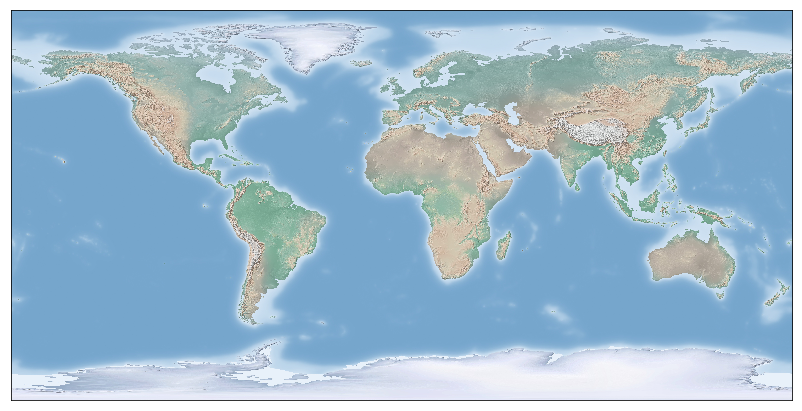

In [13]:
rcParams['figure.figsize'] = (14,10)
my_map = Basemap(
            llcrnrlon=-180, llcrnrlat=-90, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=180, urcrnrlat=90) #max longitude (urcrnrlon) and latitude (urcrnrlat)
my_map.shadedrelief()

In [14]:
lon_list = df.Longitude.values
lat_list = df.Latitude.values
name_list = df.Country.values
val_list = df.Rate.values

-26.522503000000004 31.465866 Swaziland 753.0
-13.254307999999998 34.301525 Malawi 729.0
-13.133897 27.849332 Zambia 664.0
-19.015438 29.154857 Zimbabwe 623.0
-6.369028 34.888822 Tanzania 591.0
-3.3730559999999996 29.918885999999997 Burundi 574.0
1.373333 32.290275 Uganda 548.0
-29.609988 28.233608 Lesotho 521.0
-18.766947000000002 46.869107 Madagascar 516.0
-11.875001 43.872219 Comoros 509.0
9.945587 -9.696645 Guinea 455.0
12.238333 -1.561593 Burkina Faso 451.0
17.570692 -3.9961660000000006 Mali 439.0
-30.559482 22.937506 South Africa 435.0
-18.665695 35.529562 Mozambique 428.0
-16.290154 -63.588653 Bolivia 385.0
14.497401000000002 -14.452361999999999 Senegal 378.0
6.4280550000000005 -9.429499 Liberia 372.0
-11.202691999999999 17.873887 Angola 361.0
-0.023559 37.906193 Kenya 338.0


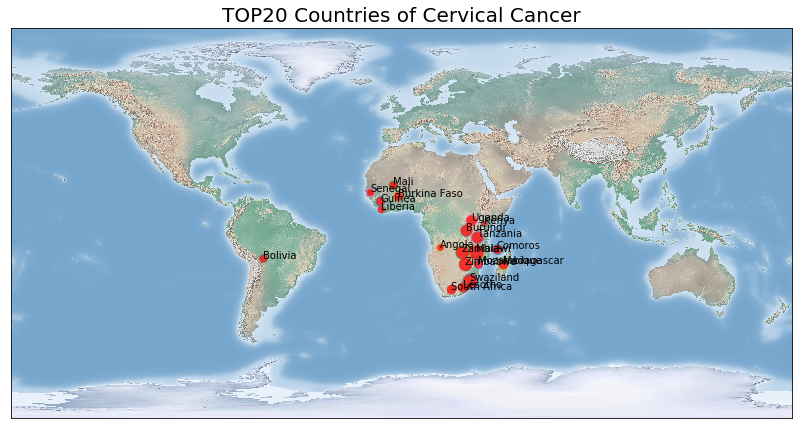

In [15]:
for (lat, lon, name, val) in zip(lat_list, lon_list, name_list, val_list):
    print (lat,lon,name,val*10)
    
    my_map.plot(lon, 
                lat,
                markerfacecolor = 'red', 
                marker='o', 
                markersize= (val/5), 
                alpha = 0.75)
    
    plt.text(lon, lat, name,
             size = 10, 
             color = "black")
    
    
#add title
plt.title("TOP20 Countries of Cervical Cancer", fontsize = 20)

my_map.shadedrelief()

可以看出，宫颈癌发生率最高的地方主要集中在非洲。

# 二、 基于病例的分类与统计分析

·子宫颈癌主要有子宫颈鳞癌与子宫颈腺癌两种类型，在代码中分别以ATYPE与BTYPE命名。在使用核磁共振仪对其扫描时，常用的有五种序列：ADC,CESAG,CETRA,T2SAG,T2TRA。<br>
·本人首先从20名A类患者和20名B类患者图像中提取特征数据，存于Features_Extracted文件夹中。<br>
·通过使用支持向量机进行分类，找到最适合用来分类的序列并可视化ROC图，并将结果存在Model_SVC文件夹中。<br>
·通过T-Test与Rank-sum Test找到对于每个序列最适合分类的特征，并存在StatsResults文件夹中。<br>


#### 数据的存储格式与形式如下所示，对于ATYPE的ADC序列，有20个.csv文件，每个文件存储有一个ATYPE病人的使用ADC序列扫描得到的特征信息

In [16]:
import pandas as pd
import os
filenames = os.listdir("Features_Extracted/ATYPE/ADC_Features")
print(filenames)
ADCTTest=pd.read_csv("Features_Extracted/ATYPE/ADC_Features/A1.csv")
ADCTTest

['A1.csv', 'A10.csv', 'A11.csv', 'A12.csv', 'A13.csv', 'A14.csv', 'A15.csv', 'A16.csv', 'A17.csv', 'A18.csv', 'A19.csv', 'A2.csv', 'A20.csv', 'A3.csv', 'A4.csv', 'A5.csv', 'A6.csv', 'A7.csv', 'A8.csv', 'A9.csv']


,original_shape_Elongation,0.4766474353570594
0,original_shape_Flatness,4.393120e-01
1,original_shape_LeastAxis,3.623452e+01
2,original_shape_MajorAxis,8.248016e+01
3,original_shape_Maximum2DDiameterColumn,5.213176e+01
4,original_shape_Maximum2DDiameterRow,7.814514e+01
5,original_shape_Maximum2DDiameterSlice,5.451025e+01
6,original_shape_Maximum3DDiameter,8.301104e+01
7,original_shape_MinorAxis,3.931396e+01
8,original_shape_Sphericity,6.467618e-01
9,original_shape_SurfaceArea,1.274313e+04


## 1. 使用SVC进行分类

对于使用不同的序列而生成的特征值，使用SVC进行分类得出每一个样本为ATYPE的概率值，设定阈值为0.5，并输出不同序列的预测精度

In [1]:
from __future__ import division
import numpy as np
import csv
import os
from StatisticalAnalysis import ImportFeatures,  ConfidenceInterval
import SimpleITK as sitk
import os,sys
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve
#from sklearn.svm import SVR
from sklearn.svm import SVC

Modality = ('ADC', 'CESAG', 'CETRA', 'T2SAG', 'T2TRA',)
addr_AType = 'Features_Extracted/ATYPE/'
addr_BType = 'Features_Extracted/BTYPE/'

patho = ('LVSI', 'Nerve', 'LYMN', 'ParaAorta', 'Stroma')#病理学
NumOfSubjects = 40
cv = KFold(NumOfSubjects)#K折检验
fpr = {}
tpr = {}
thresholds = {}
auc = {}
acc = {}
sen = {}
spe = {}

result_folder = '../Model_SVC/TYPE/'

for i_modality_index in np.arange(5):

    addr_feature_A = addr_AType + Modality[i_modality_index] + '_Features/' 
    addr_feature_B = addr_BType + Modality[i_modality_index] + '_Features/'

    feature_arrayA0, patientA, feature_par = ImportFeatures(addr_feature_A)
    feature_arrayB0, patientB, feature_par = ImportFeatures(addr_feature_B)
    
 
    # remove outlier 
    feature_arrayA = np.zeros([np.size(feature_arrayA0, 0), np.size(feature_arrayA0, 1)]) + 1e-10
    UsePositionA = np.where(abs(feature_arrayA0) > 1e-10)
    feature_arrayA[UsePositionA] = feature_arrayA0[UsePositionA]  

    feature_arrayB = np.zeros([np.size(feature_arrayB0, 0), np.size(feature_arrayB0, 1)]) + 1e-10
    UsePositionB = np.where(abs(feature_arrayB0) > 1e-10)
    feature_arrayB[UsePositionB] = feature_arrayB0[UsePositionB]

    NumOfFeaturesA = np.size(feature_arrayA0[:, 0])#Feature的数量  105
    NumOfFeaturesB = np.size(feature_arrayB0[:, 0])

    NumOfSubjectsA = np.size(feature_arrayA0[0, :])#病人的数量，20
    NumOfSubjectsB = np.size(feature_arrayB0[0, :])

    feature_array = np.transpose(np.hstack((feature_arrayA, feature_arrayB)))
    patient = np.hstack((patientA, patientB))#病人名（40，1）
    group_inf = np.hstack((np.ones(NumOfSubjectsA), np.zeros(NumOfSubjectsB)))


    test_score_record = {}
    test_score = []
    for train, test in cv.split(feature_array, group_inf):   #40折，test为1，trian为39   array([0])   
        train_feature_array = feature_array[train, :]
        train_label = group_inf[train]
        test_feature_array = feature_array[test, :]
        test_label = group_inf[test]

        #数据预处理，给数据标准化
        scaler = preprocessing.StandardScaler()
        scaler.fit(train_feature_array)
        train_DataX = scaler.transform(train_feature_array)
        test_DataX = scaler.transform(test_feature_array)

        clf = SVC(kernel='rbf',probability=True)
      
        
        
        clf.fit(train_DataX, train_label)
        a = clf.predict_proba(test_DataX)
        test_score_record[patient[test[0]]] = clf.predict_proba(test_DataX)[0][1]  
        test_score.append(test_score_record[patient[test[0]]])
        print ('patient: ', patient[test[0]], ', predict: ', test_score_record[patient[test[0]]])

    bit_score = np.array(np.array(test_score)> 0.5).astype(int)  #大于0.5则标记为1   
 
    #roc_curve
    fpr[Modality[i_modality_index]], tpr[Modality[i_modality_index]], thresholds[Modality[i_modality_index]] = roc_curve(group_inf, np.array(test_score), pos_label=1)

    sen[Modality[i_modality_index]] = np.sum(bit_score*group_inf)/np.sum(group_inf)
    spe[Modality[i_modality_index]] = np.sum((1-bit_score)*(1-group_inf))/np.sum(1-group_inf)

    auc[Modality[i_modality_index]] = roc_auc_score(group_inf, test_score)#计算预测得分曲线下的面积
    Score = np.sum(np.count_nonzero(bit_score == group_inf))#预测对的例子个数
    acc[Modality[i_modality_index]] = Score / NumOfSubjects#预测精度

    # confidence interval
    CI_arr = (bit_score==group_inf)  #由True，False组成的array
    up, down = ConfidenceInterval(CI_arr)#置信区间

 
    CI_sen_pos = np.where(group_inf == 1)#找到正样本的索引[0,1,2...19]
    sen_group_inf = group_inf[CI_sen_pos]#[1,1,1,]
    sen_rst = bit_score[CI_sen_pos]#正样本的预测值
    CI_sen = (sen_group_inf == sen_rst)#比较正样本是否预测正确
    # spe
    CI_spe_pos = np.where(group_inf == 0)
    spe_group_inf = group_inf[CI_spe_pos]
    spe_rst = bit_score[CI_spe_pos]
    CI_spe = (spe_group_inf == spe_rst)#比较负样本是否预测正确

#获得置信区间
    sen_up, sen_down = ConfidenceInterval(CI_sen)
    spe_up, spe_down = ConfidenceInterval(CI_spe)

    
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # print and saving
    print('nested_test_accuracy:', np.array(bit_score == group_inf).astype(int))
    print('prob:', test_score)#预测得分
    print('Modality:',Modality[i_modality_index])
    print('Accuracy:', Score)#预测对的个数
    print('Accuracy:', acc[Modality[i_modality_index]])#预测精度
    print('AUC: ', auc[Modality[i_modality_index]])#曲线面积
    
    prob_filename = result_folder + 'TYPE_' + str(Modality[i_modality_index]) + '_prob.csv'
    with open(prob_filename, 'w+') as f:
        f.write('auc' + ',' + str(auc[Modality[i_modality_index]]) + '\n')

        f.write('Accuracy' + ',' + str(Score / NumOfSubjects) + '\n')
        f.write('sensitivity' + ',' + str(sen[Modality[i_modality_index]]) + '\n')
        f.write('specificity' + ',' + str(spe[Modality[i_modality_index]]) + '\n')

        f.write('CI_acc' + ',' + str(down) + ',' + str(up) + ',' + '\n')
        f.write('CI_sen' + ',' + str(sen_down) + ',' + str(sen_up) + ',' + '\n')
        f.write('CI_spe' + ',' + str(spe_down) + ',' + str(spe_up) + ',' + '\n')


        f.write('ACCNUM' + ',' + str(Score) + '\n')

        for i in np.arange(np.size(test_score)):
            f.write(patient[i] + ',' + str(test_score[i]) + '\n')
    f.close()


patient:  A1 , predict:  0.7107338724487792
patient:  A10 , predict:  0.7836439340565639
patient:  A11 , predict:  0.8618790317868744
patient:  A12 , predict:  0.6325054062208331
patient:  A13 , predict:  0.729169308227622
patient:  A14 , predict:  0.5919822112268885
patient:  A15 , predict:  0.7900706745125076
patient:  A16 , predict:  0.9418455183857184
patient:  A17 , predict:  0.7870995176696329
patient:  A18 , predict:  0.6427726241566585
patient:  A19 , predict:  0.667460360902967
patient:  A2 , predict:  0.2893888358398472
patient:  A20 , predict:  0.848197849310254
patient:  A3 , predict:  0.8160187317937613
patient:  A4 , predict:  0.5138506695090634
patient:  A5 , predict:  0.7812758039467369
patient:  A6 , predict:  0.7508023031705875
patient:  A7 , predict:  0.47695850555861635
patient:  A8 , predict:  0.7050608821450705
patient:  A9 , predict:  0.03943557954866006
patient:  B1 , predict:  0.17697555859255706
patient:  B10 , predict:  0.29686032658636935
patient:  B11 , pre

patient:  B11 , predict:  0.6749838495233483
patient:  B12 , predict:  0.4672404047298712
patient:  B13 , predict:  0.4022012917508962
patient:  B14 , predict:  0.4858127506062313
patient:  B15 , predict:  0.3351599458782722
patient:  B16 , predict:  0.3084752286878525
patient:  B17 , predict:  0.5410167492680275
patient:  B18 , predict:  0.22478075993253477
patient:  B19 , predict:  0.39970174543272996
patient:  B2 , predict:  0.438768574424038
patient:  B20 , predict:  0.2598196062788273
patient:  B3 , predict:  0.15409737606684917
patient:  B4 , predict:  0.5579989101210235
patient:  B5 , predict:  0.42919382911214266
patient:  B6 , predict:  0.7392380460484576
patient:  B7 , predict:  0.2893496898539646
patient:  B8 , predict:  0.6619269498056412
patient:  B9 , predict:  0.2653126847493696
nested_test_accuracy: [0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 1]
prob: [0.48118029276403934, 0.7784724809011995, 0.6146197797577291, 0.17487866959332538, 0

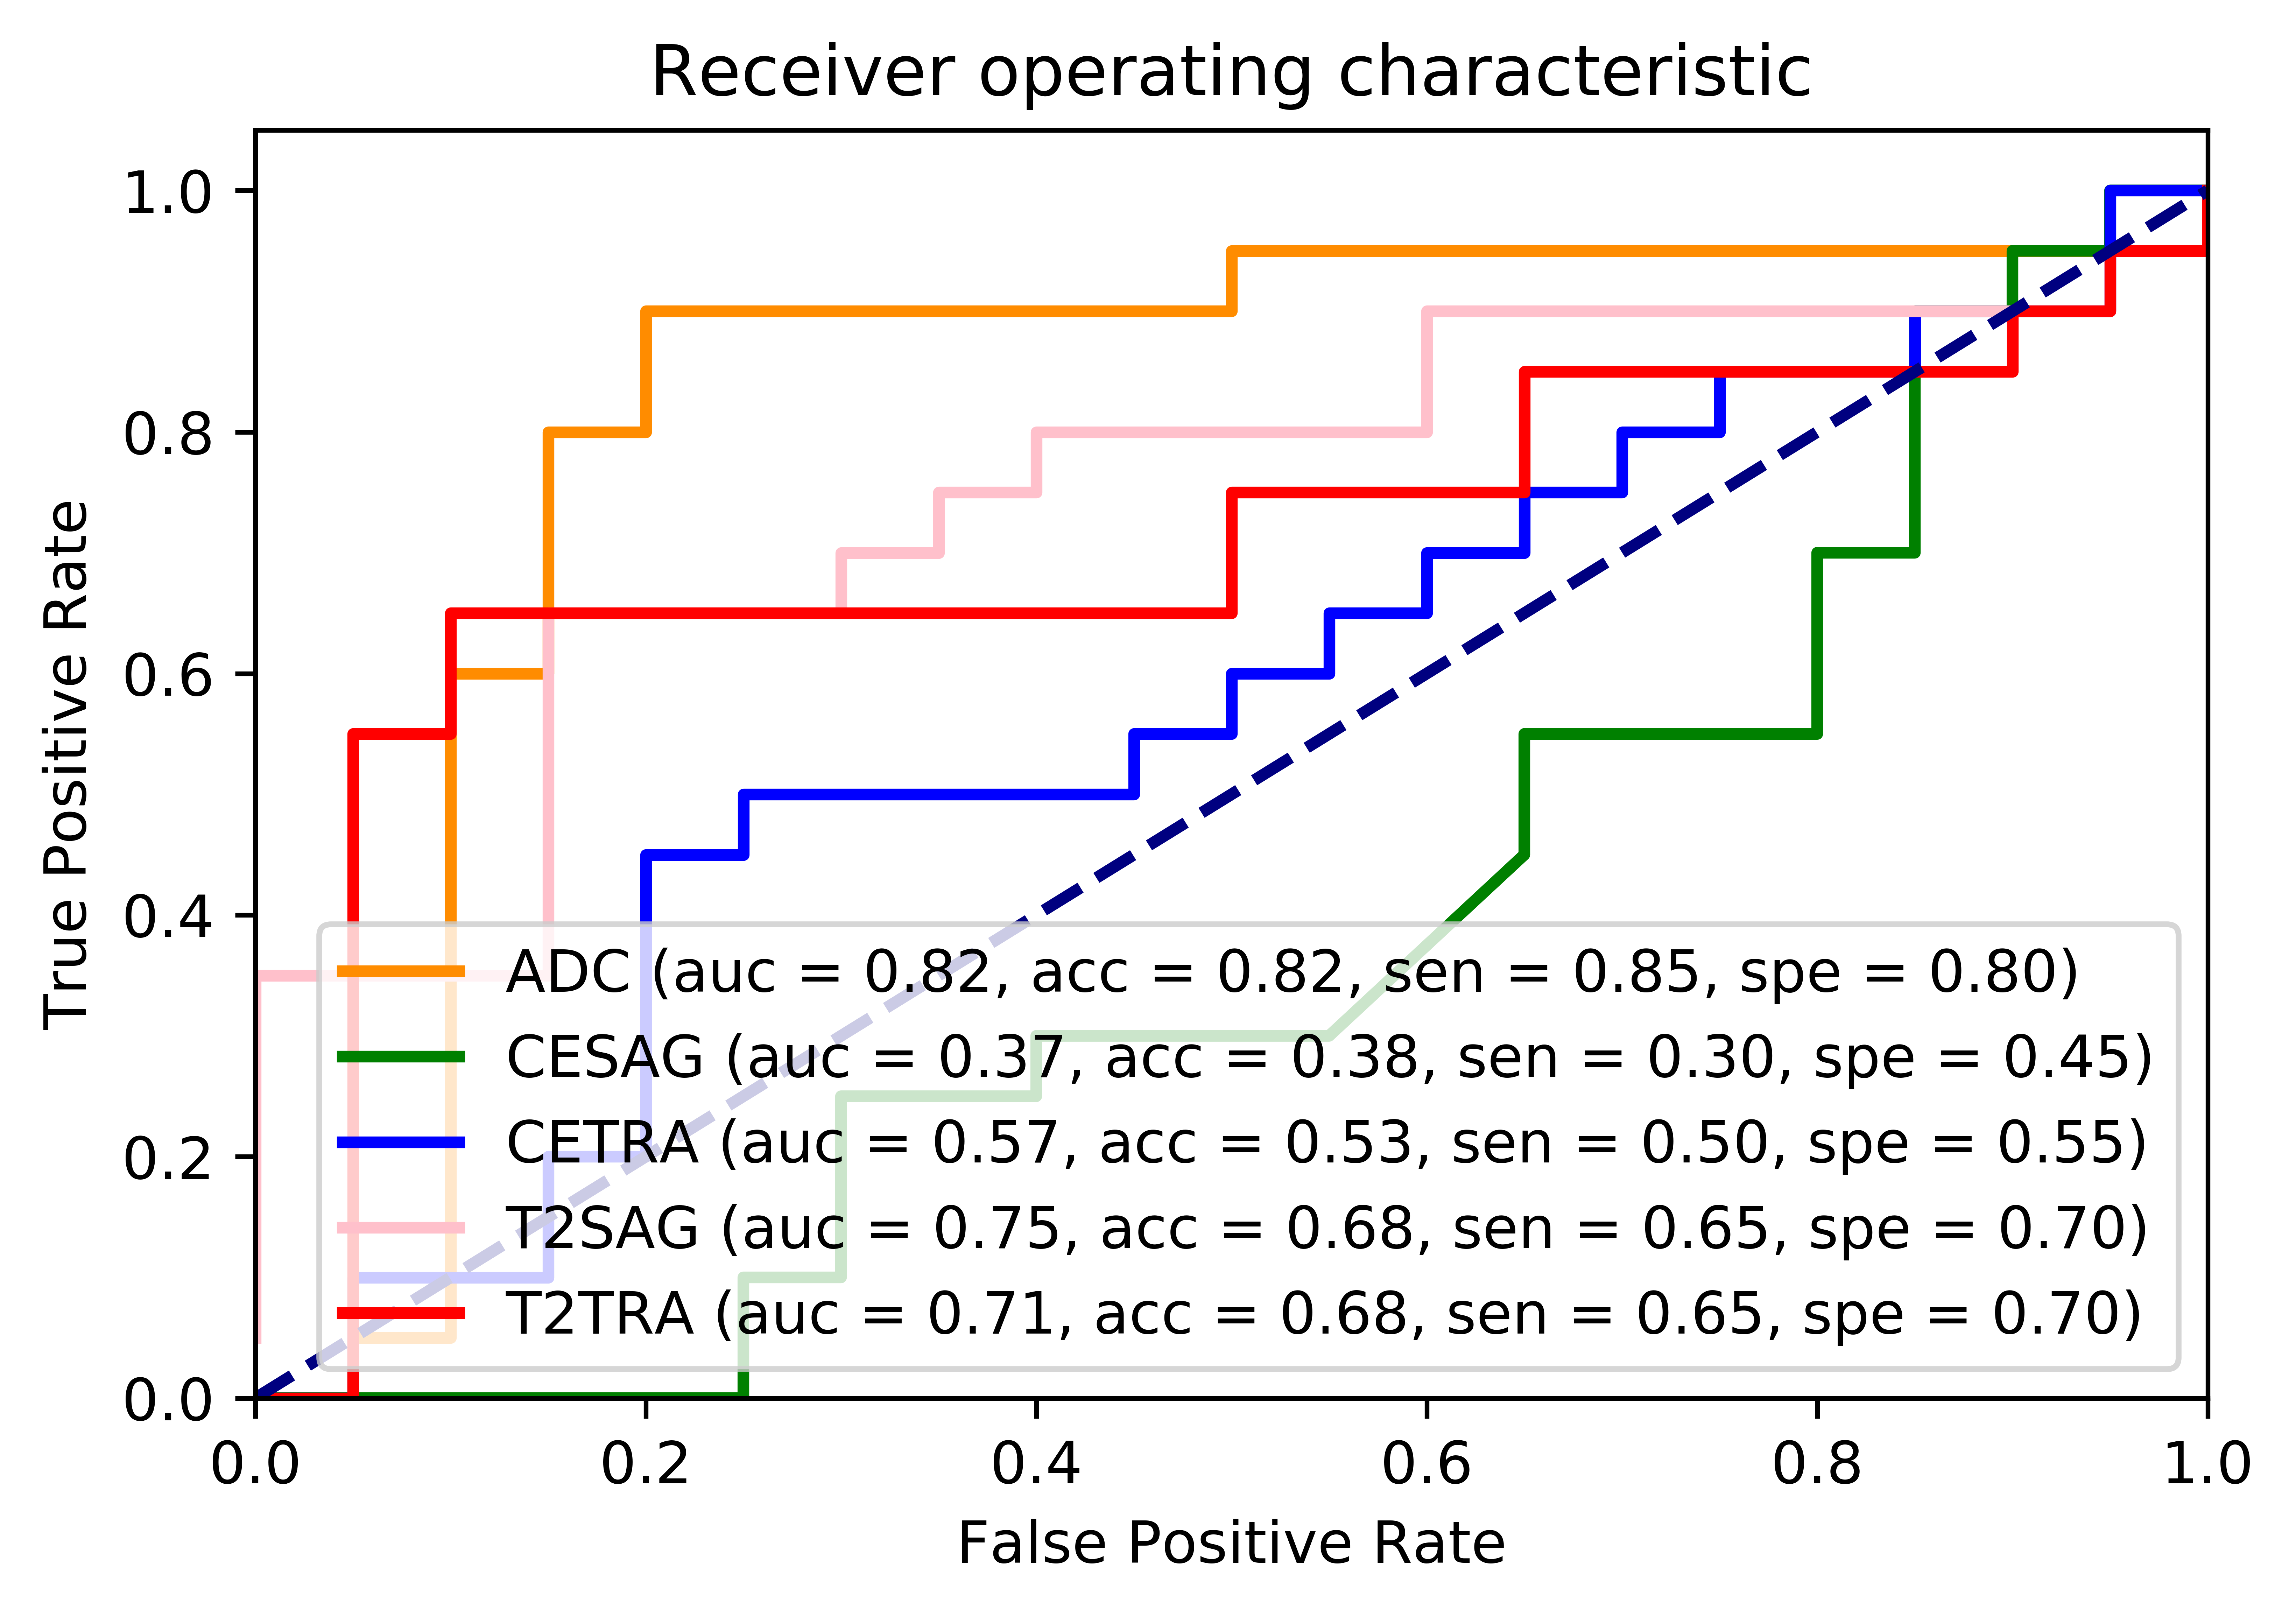

In [2]:
plt.figure(dpi=1200)
lw = 2
plt.plot(fpr['ADC'], tpr['ADC'], color='darkorange', lw=lw,
         label='ADC (auc = %0.2f, acc = %0.2f, sen = %0.2f, spe = %0.2f)' % (auc['ADC'], acc[('ADC')], sen[('ADC')], spe['ADC']))
plt.plot(fpr['CESAG'], tpr['CESAG'], color='green', lw=lw,
         label='CESAG (auc = %0.2f, acc = %0.2f, sen = %0.2f, spe = %0.2f)' % (auc['CESAG'], acc['CESAG'], sen[('CESAG')], spe['CESAG']))
plt.plot(fpr['CETRA'], tpr['CETRA'], color='blue', lw=lw,
         label='CETRA (auc = %0.2f, acc = %0.2f, sen = %0.2f, spe = %0.2f)' % (auc['CETRA'], acc['CETRA'], sen[('CETRA')], spe['CETRA']))
plt.plot(fpr['T2SAG'], tpr['T2SAG'], color='pink', lw=lw,
         label='T2SAG (auc = %0.2f, acc = %0.2f, sen = %0.2f, spe = %0.2f)' % (auc['T2SAG'], acc['T2SAG'], sen[('T2SAG')], spe['T2SAG']))
plt.plot(fpr['T2TRA'], tpr['T2TRA'], color='red', lw=lw,
         label='T2TRA (auc = %0.2f, acc = %0.2f, sen = %0.2f, spe = %0.2f)' % (auc['T2TRA'], acc['T2TRA'], sen[('T2TRA')], spe['T2TRA']))
plt.plot()

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(
    fname=result_folder + str('TYPE') + '.png')

#### 通过改变分类阈值，画出不同序列的ROC曲线
可以看到，使用ADC的分类效果最好。

## 2 PCA降维

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
new=pca.fit_transform(feature_array)

#plt.scatter(new[0:, 0], new[:, 1],marker='o')

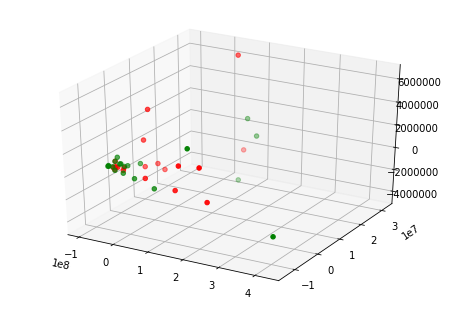

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(new[:20,0],new[:20,1], new[:20,2],c='g')  # 绘制数据点
ax.scatter(new[20:40,0],new[20:40,1],new[20:40,2], c='r')



为了方便可视化，我这里选择了n_components=3，绿色点为A类，红色点为B类，可以看出，n_components=3还不足以很好地进行分类。


## 3 通过T-Test与Rank-sum Test找到对于每个序列最适合分类的特征，并存在StatsResults文件夹中。

### 统计知识：T-Test
本实验进行的是对不同序列下的每一种特征进行双侧检验（零假设为ATYPE=BTYPE,备择假设为ATYPE！=BTYPE），检验水准：α=0.05，使用scipy中的stats.ttest_ind计算出p值，并与0.05比较，若小于0.05，则说明两者的差别具有统计学意义，则将特征取出，并将其存入StatsResults/TYPE/TTest 中。
### 统计知识：Rank-sum Test
与T-Test类似，对ATYPE与BTYPE进行双侧检验，使用scipy中的stats.ranksums计算出p值，并与0.05比较，若小于0.05，则说明两者的差别具有统计学意义，则将特征取出，并将其存入StatsResults/TYPE/RanksumTest 中。

In [19]:
import numpy as np
import csv
import os
from StatisticalAnalysis import ImportFeatures, TTestOfFeatures,  RankSumTestOfFeatures, saving_stats_results, saving_selected_feature
import SimpleITK as sitk

Modality = ('ADC', 'CESAG', 'CETRA', 'T2SAG', 'T2TRA',)
addr_AType = 'Features_Extracted/ATYPE/'
addr_BType = 'Features_Extracted/BTYPE/'
ResultAddress = 'StatsResults/TYPE/'

if __name__ == '__main__':
    for i_modality in Modality:

        addr_feature_A = addr_AType + i_modality + '_Features/'
        addr_feature_B = addr_BType + i_modality + '_Features/'
        result_addr = ResultAddress + i_modality + '_stats/'

        feature_arrayA0, patientA, feature_par = ImportFeatures(addr_feature_A)
        feature_arrayB0, patientB, feature_par = ImportFeatures(addr_feature_B)

        # remove outlier
        feature_arrayA = np.zeros([np.size(feature_arrayA0, 0), np.size(feature_arrayA0, 1)]) + 1e-10
        feature_arrayB = np.zeros([np.size(feature_arrayB0, 0), np.size(feature_arrayB0, 1)]) + 1e-10
        UsePositionA = np.where(abs(feature_arrayA0) > 1e-10)
        UsePositionB = np.where(abs(feature_arrayB0) > 1e-10)
        feature_arrayA[UsePositionA] = feature_arrayA0[UsePositionA]
        feature_arrayB[UsePositionB] = feature_arrayB0[UsePositionB]
        NumOfFeatures = np.size(feature_arrayA0[:, 0])
        
        # Welch TTest
        addr_of_ttest = result_addr + 'TTest/'
        if os.path.exists(addr_of_ttest) == 0:
            os.makedirs(addr_of_ttest)
    
        TTest_ResultName = os.path.join(addr_of_ttest,  i_modality + '.csv')
        TTest_SelName = os.path.join(addr_of_ttest, i_modality + '_selected.csv')
    
        t_TTest, p_TTest, FeatureIndex_TTest = TTestOfFeatures(feature_arrayA, feature_arrayB)
        saving_stats_results(TTest_ResultName, feature_par, t_TTest, p_TTest)
        saving_selected_feature(TTest_SelName, feature_par, FeatureIndex_TTest, p_TTest)
        
        # RankSum Test
        addr_of_Ranksum = result_addr + 'RanksumTest/'

        if os.path.exists(addr_of_Ranksum) == 0:
            os.makedirs(addr_of_Ranksum)

        Ranksum_ResultName = os.path.join(addr_of_Ranksum, i_modality + '.csv')
        Ranksum_SelName = os.path.join(addr_of_Ranksum, i_modality + '_selected.csv')

        t_Ranksum, p_Ranknum, FeatureIndex_Ranksum = RankSumTestOfFeatures(feature_arrayA, feature_arrayB)
        saving_stats_results(Ranksum_ResultName, feature_par, t_Ranksum, p_Ranknum)
        saving_selected_feature(Ranksum_SelName, feature_par, FeatureIndex_Ranksum, p_Ranknum)

 选出的特征格式如下所示

In [15]:
import pandas as pd
ADCTTest=pd.read_csv("StatsResults/TYPE/ADC_stats/TTest/ADC_selected.csv")
ADCTTest

,,47
0,original_shape_Elongation,0.025289
6,original_shape_Maximum2DDiameterSlice,0.048629
8,original_shape_MinorAxis,0.045533
11,original_shape_SurfaceVolumeRatio,0.036645
14,original_firstorder_90Percentile,0.033634
16,original_firstorder_Entropy,0.000553
17,original_firstorder_InterquartileRange,0.001209
18,original_firstorder_Kurtosis,0.002176
20,original_firstorder_MeanAbsoluteDeviation,0.001314
25,original_firstorder_RobustMeanAbsoluteDeviation,0.000590


因此，对于ADC序列扫描得到的特征来说，可以认为ATYPE与BTYPE在47个特征上具有统计学差异